# Complete Notes to ML

### Types of Machine Learning system

1. ***Supervised Learning***

   In `Supervised Learning` the training set you feed to the algorithm includes the desired solutions, called `labels`. A typical supervised learning  task is classidication. For example a spam filter.

2. ***Unsupervised Learning***

    In `Unsupervised Learning` the training set you feed to the algorithm is unlabeled. The system tries to learn without a teacher. For explae, say you have a lot og data about your blog's visitors and you might want to run a clustering algorithm which basically detects the groups of similar visitors for example you grouped you visitor's with respect to age or anything else.

3. ***Semi-supervised Learning***

    Since labeling dats is time-consuming and costly you will often have plenty of unlabeled instances, and few labeled instances. Some algorithms can deal with data that's partially labeled. This is called `semi-supervised learning`.

4. ***Self-supervised Learning***

   Another approach to machine learning involves actually generating a fully labeled dataset from a fully unlabeled one. Again, once the whole dataset is labeled any supervised learning algorithm can be used. This approach is called `self-supervised`.

---

### Batch Learning vs Online Learning

* `Batch Learning`

      * Train on the whole dataset at once (or in fixed-size batches).

      * When new data comes in, you usually retrain from scratch.

      * Example: Standard LinearRegression in scikit-learn.

* `Online Learning`

      * Train in small steps as data arrives (mini-batches or even one sample at a time).

      * Uses methods like partial_fit().

      * Keeps the knowledge from before.

      * Example: SGDClassifier, Perceptron, MiniBatchKMeans.

***Think of online learning like playing Mario. Imagine the game has many levels. Normally,say if you die at level 20, you might have to restart all the way from level 1. That’s like batch learning — it always trains from the beginning with all the data.***

***But with online learning `(using partial_fit)`, it’s different. If you die at level 20, you don’t need to start over from level 1. Instead, you can continue training from level 20 itself, using the new data you just received. In other words, the model keeps building on what it already knows, instead of starting fresh every time. It's more like a checkpoint but for every new data received online***

### Types of variables:

1. Numerical Variable

      * Discrete Variable
  
      * Continuous Variable

2. Categorical Variable (Object)

      * Ordianl Variable

      * Nominal Variable

4. Dates & Time Variables

5. Mixed Variables (Object) -> Variables which contains numbers and categorical data (eg. studen_id, 3+)

---

# Data Cleaning

1. Data cleaning is a process of preparing data for analysis / `ML` / `DL` by removing or modifying data that is incorrect, incomplete, irrevelent, duplicate, or improperly formatted.

    * Handling Missing Data
 
    * Outlier Detection and Handling
 
    * Data Scaling and transformation
 
    * Encoding Categorical Variables
 
    * Handeling Duplicates
 
    * Dealing with Inconsistent Data
 
2.  

---

## Identifying and removing missing values

The dataset is taken from kaggle and the link is [here](https://www.kaggle.com/datasets/tanishaj225/loancsv)

In [1]:
import numpy as np
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import warnings

# Ignore only FutureWarning and DeprecationWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# pip install kagglehub

In [3]:
# Set the path to the file you'd like to load
file_path = "loan.csv"  # file inside tanishaj225/loancsv dataset

# Load dataset into pandas DataFrame
loan_df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "tanishaj225/loancsv",   # dataset slug
    path=file_path           # specify file to load
)

In [4]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_df.shape

(614, 13)

In [6]:
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Overal percent of missing values in the given dataset
(loan_df.isna().sum().sum() / (loan_df.shape[0] * loan_df.shape[1])) *100

np.float64(1.8667000751691305)

In [8]:
# What percent of null values are present in every column
(loan_df.isna().sum() / loan_df.shape[0]) *100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
# If you wish to know how many notnull values are present in your dataset then use
loan_df.notnull().sum()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [10]:
loan_df.notnull().sum().sum()

np.int64(7833)

#### For graphical representation of all the null values and not values present in your datset we will use Seaborn and matplotlib

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

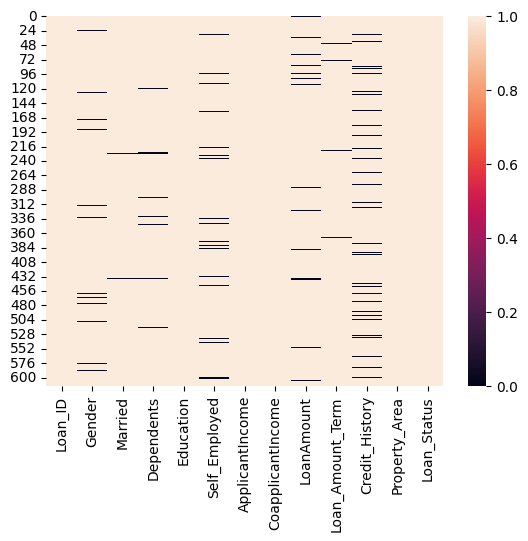

In [12]:
sns.heatmap(loan_df.notnull())
plt.show()

*From the graphical representation, the black dots indicate missing (null) values, while the white or light-colored areas 
represent non-missing (valid) values.*

#### Note:

* If a dataset has more than 50% of missing values, it’s generally not useful as it contains too little reliable information and mostly random scraps of data. In such cases it’s often better to create a new dataset from scratch. Even if you attempt to work with such a dataset extracting meaningful insights will be very difficult.

* On the other hand, if your dataset has less than 50% of the data missing, the dataset is still worth working on. However, if you find that more than 50% of the values are missing in a any of the column, you should consider dropping that column if it doesn't have any usefull data in it. And if the column is important, you can instead try filling up the missing values — which is usually a better option than discarding the entire dataset.

---
## Handling Missing Values

In order to remove the null values we have two methods:

1. If a column which has no important feature and the column has more than 50% or the data missing then we can drop or delte the entire column.

2. Or we could just delete the respective row which has the missing values in it.

3. My imputation idea:

    * Fill missing values (imputation) →

        * If the feature is `numeric (int/float)` →
          We can replace the missing values with:

            * The mean, median, or mode of the column.

            * Or in time-series data, use forward-fill/backward-fill (value above or below).

            * Or even more advanced: use interpolation or predictive models.

        * If the feature is `categorical (string/labels)` →
          You can fill missing values with:

            * The most frequent category (mode).

            * A placeholder like `"Unknown"` or `"Missing"`.
         
***If a row has too many missing values across different columns, then imputing everything might make the row unreliable (it becomes more “fabricated” than real). In that case, dropping the row could be a better option.***

#### In ML context

Since I am planning to train ML models, here’s the rule of thumb:

* Don’t blindly drop rows/columns unless missing values are very high `(>50%)`.

* Impute missing values whenever possible, because ML models can’t handle NaNs directly.

In [13]:
loan_df.shape

(614, 13)

In [14]:
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

For starters let's drop the column which has the most missing values since Credit History has 50 missing value so 

Let's just drop the entire column in order to drop column we will use: 

`dataset.drop(columns='Credit_History',inplace=True)`

In [15]:
loan_df.drop(columns='Credit_History',inplace=True)

In [16]:
loan_df.shape

(614, 12)

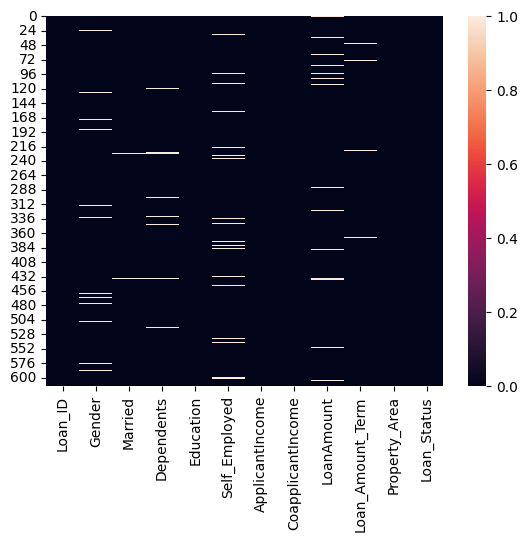

In [17]:
sns.heatmap(loan_df.isna());

Let's learn how to drop an entire row but first let's find a row of data which one or more than one missing value with 
the help of the heatmap we just plot.

We can see there are two null values between 216 and 240 for let's see those lines at the dataframe for looking up between those two numbers 
we will be using `.loc[]` property

In [18]:
loan_df.loc[220:240]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
220,LP001736,Male,Yes,0,Graduate,No,2221,0.0,60.0,360.0,Urban,N
221,LP001743,Male,Yes,2,Graduate,No,4009,1717.0,116.0,360.0,Semiurban,Y
222,LP001744,Male,No,0,Graduate,No,2971,2791.0,144.0,360.0,Semiurban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,Semiurban,Y
224,LP001750,Male,Yes,0,Graduate,No,6250,0.0,128.0,360.0,Semiurban,Y
225,LP001751,Male,Yes,0,Graduate,No,3250,0.0,170.0,360.0,Rural,N
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,Urban,N
227,LP001758,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,Semiurban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,Semiurban,Y
229,LP001761,Male,No,0,Graduate,Yes,6400,0.0,200.0,360.0,Rural,Y


As we can see there is 2 NaN values at 228 so let's try droping the entire row.

And for droping the entire row we will use:

`dataset.dropna(inplace=True)`

#### Note:

This `.dropna()` function will drop all the rows which have null values.

But if you wish to drop only one row of data then use:

`df_new = df.drop(index=1)` 

This will drop the row of data with index 1

In [19]:
# Droping the row at index no. 228
df_new = loan_df.drop(index=228)

In [20]:
df_new.loc[220:240]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
220,LP001736,Male,Yes,0,Graduate,No,2221,0.0,60.0,360.0,Urban,N
221,LP001743,Male,Yes,2,Graduate,No,4009,1717.0,116.0,360.0,Semiurban,Y
222,LP001744,Male,No,0,Graduate,No,2971,2791.0,144.0,360.0,Semiurban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,Semiurban,Y
224,LP001750,Male,Yes,0,Graduate,No,6250,0.0,128.0,360.0,Semiurban,Y
225,LP001751,Male,Yes,0,Graduate,No,3250,0.0,170.0,360.0,Rural,N
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,Urban,N
227,LP001758,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,Semiurban,Y
229,LP001761,Male,No,0,Graduate,Yes,6400,0.0,200.0,360.0,Rural,Y
230,LP001765,Male,Yes,1,Graduate,No,2491,2054.0,104.0,360.0,Semiurban,Y


As you can see the remaining rows with single or more NaN values are still there but now I will remove all the 
rows with NaN values.

In [21]:
loan_df.dropna(inplace=True)

In [22]:
loan_df.shape

(523, 12)

In [23]:
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

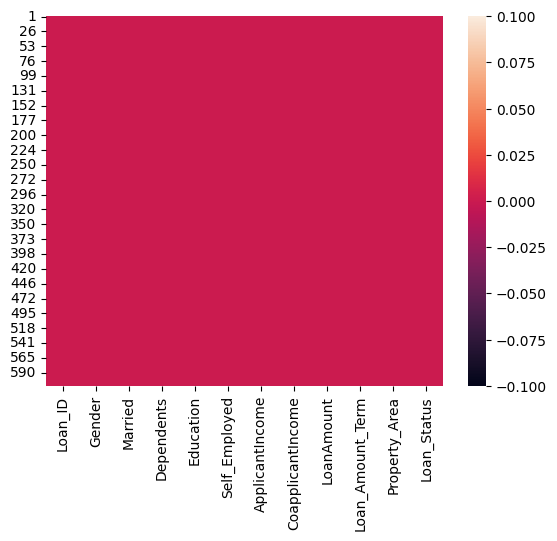

In [24]:
sns.heatmap(loan_df.isna())

As you can see there are no rows with NaN values are present in the dataset.

When we compare the colors in the heatmap with the color scale on the right, we can see that the heatmap matches the shade corresponding to `0.000` on the scale. This indicates that there are no missing values in the dataset.

In [25]:
# So now comes the question what percent of rows did we remove from the dataset
relevant_data = ((614-523) / 614) * 100
relevant_data

14.82084690553746

This means we have removed 14% of our data just to remove NaN values from each row. So much of our data has been lost maybe one those data had somthing really important data which might make the model work better for that purpose we should not remove rows of data without thinking.

### Imputing Categorical Data (dtype = object)

Here, we will learn how to handle and fill missing (NaN) values in categorical data columns.

Before moving on to filling the NaN values, we will save the dataset again under a different variable name. This will help us easily distinguish between the original dataset and the modified one.

In [26]:
# Set the path to the file you'd like to load
file_path = "loan.csv"  # file inside tanishaj225/loancsv dataset

# Load dataset into pandas DataFrame
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "tanishaj225/loancsv",   # dataset slug
    path=file_path           # specify file to load
)

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Forward Fill (ffill)

* Takes the last known (previous) value and fills it forward into the missing cell.

* Think of it as “carry the value from above ↓”.
    * eg:

             Data:   [10, NaN, NaN, 20]
             ffill:  [10, 10, 10, 20]


### Backward Fill (bfill)

* Takes the next known value and fills it backward into the missing cell.

* Think of it as “pull the value from below ↑”.
    * eg:
 
            Data:   [10, NaN, NaN, 20]
            bfill:  [10, 20, 20, 20]

##### Syntax for forward filling:

    df.fillna(method='ffill')

##### Syntax for backward filling:

    df.fillna(method='bfill')


##### When filling missing values:

* Use `axis=0` to fill along rows (down each column).

* Use `axis=1` to fill along columns (across each row).

##### Rule of Thumb

* Never use ffill/bfill with axis=1 on mixed-type data → it can corrupt columns.

* Instead, always fill missing values per column, based on that column’s type.

---

### Pro Tips for Big Data

1. Use column-wise operations (vectorized) → .fillna(), .ffill(), .bfill().

2. Avoid axis=1 filling (row-wise), since it forces pandas to scan across many columns and sometimes, using `ffill/bfill` with `axis=1` you might end up filling a categorical value into a numeric column, which forces the entire column to change its data type.

3. If dataset is too huge to fit in memory → use Dask or Polars (they handle larger-than-RAM data efficiently).

In [29]:
df.Gender.fillna(df.Gender.mode()[0],inplace=True)

In [30]:
df.Gender.isna().sum()

np.int64(0)

### What this line does is:

**df.Gender.mode()**

* .mode() finds the most frequent value (mode) in the column.

* Returns a pandas Series (because there can be multiple modes).

* Example:

    Male

**df.Gender.mode()[0]**

* Picks the first most frequent value.

* In this case, "Male".

** .fillna(df.Gender.mode()[0])**

* Fills all the NaN values in "Gender" column with the most frequent category (the mode).

* Example:

    Before:

          0    Male
          1    Female
          2    NaN
          3    Male

    After:

          0    Male
          1    Female
          2    Male   <- filled with mode
          3    Male

And the argument `inplace=True` just simply overwrite the old data 